In [30]:
# Lets compute and see the relationship between the angle and the z-axis

import MDAnalysis as md
import matplotlib.pyplot as plt
import numpy as np

# Upload and go to last frame
u = md.Universe('md_1.tpr', 'md_1_noPBC.xtc')
u.trajectory[-1]

# Select protein atoms
protein = u.select_atoms("protein")
backbn = protein.select_atoms("backbone")

# Check box dimensions - Should be around 16x16x20
xd, yd, zd = u.trajectory[-1].dimensions[0:3]/10

In [31]:
# Time info of the simulation - ps
ti = u.trajectory[0].time
tf = u.trajectory[-1].time
nt = len(u.trajectory)-1
deltat = (tf-ti)/nt
t = np.linspace(ti,tf,nt+1)

t_eq = 10000 # ps

# Mask to Select equilibrated data
mask = (t >= t_eq)

In [32]:
# Get an algortihm to compute average of each atom of the molecule
mol = 0
coords_saving = []
for ts in u.trajectory[mask]:
    # chains = protein.fragments[3*mol:3*mol + 3]
    chains = backbn.fragments[3*mol:3*mol + 3]
    colmol = chains[0] + chains[1] + chains[2]
    coords = colmol.positions / 10
    coords_saving.append(coords)

In [33]:
mean_atoms = np.mean(coords_saving, 0)
std_atoms = np.std(coords_saving, 0)
std_mean = np.mean(std_atoms, 0)

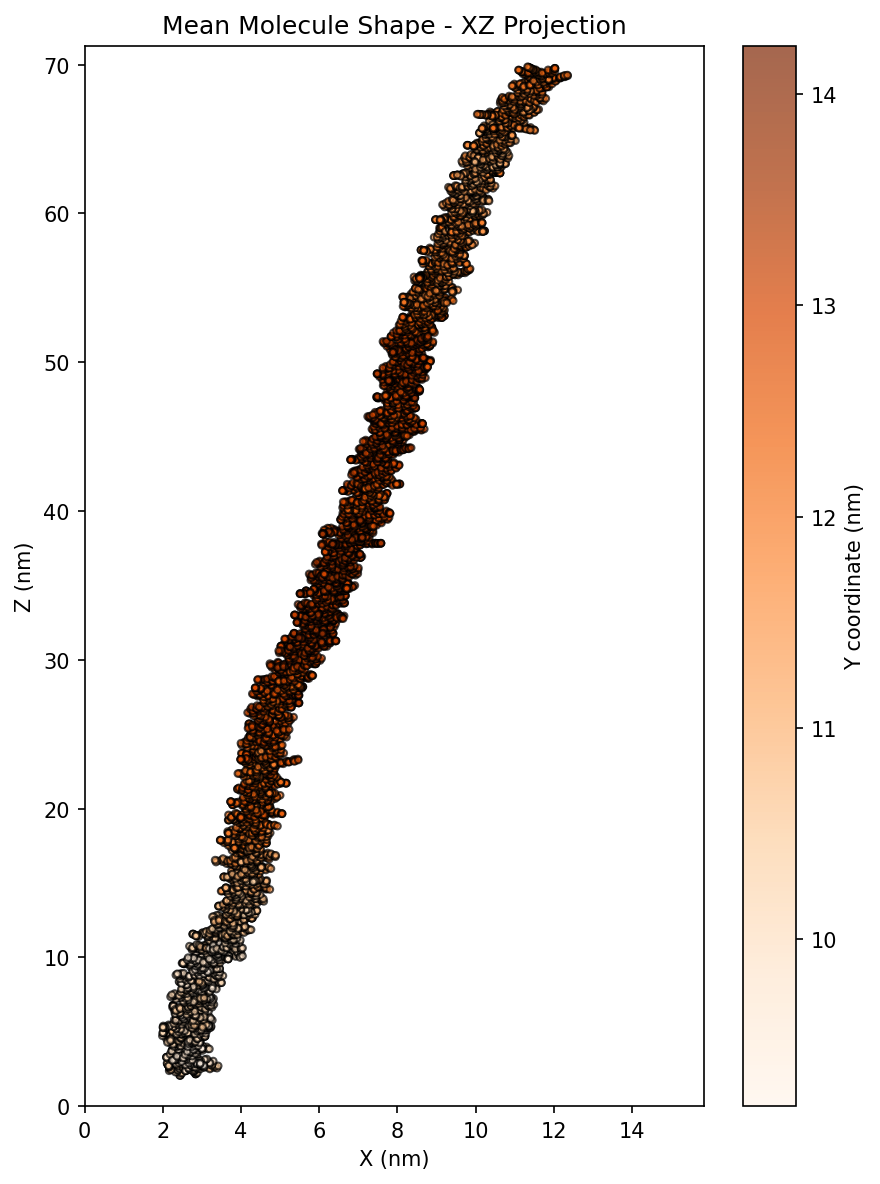

In [34]:
plt.figure(figsize=(6,8), dpi=150)
sc = plt.scatter(mean_atoms[:, 0], mean_atoms[:,2], c=mean_atoms[:,1], cmap='Oranges', s=10, edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Y coordinate (nm)')
plt.xlabel("X (nm)")
plt.ylabel("Z (nm)")
plt.title("Mean Molecule Shape - XZ Projection")
plt.xlim(0, xd)
plt.ylim(0, zd)
plt.tight_layout()
plt.show()


In [35]:
# Do the fluctiations are really just "noise" ?
mol = 4
atom = 1
coords_atom = np.array(coords_saving)[:, atom]

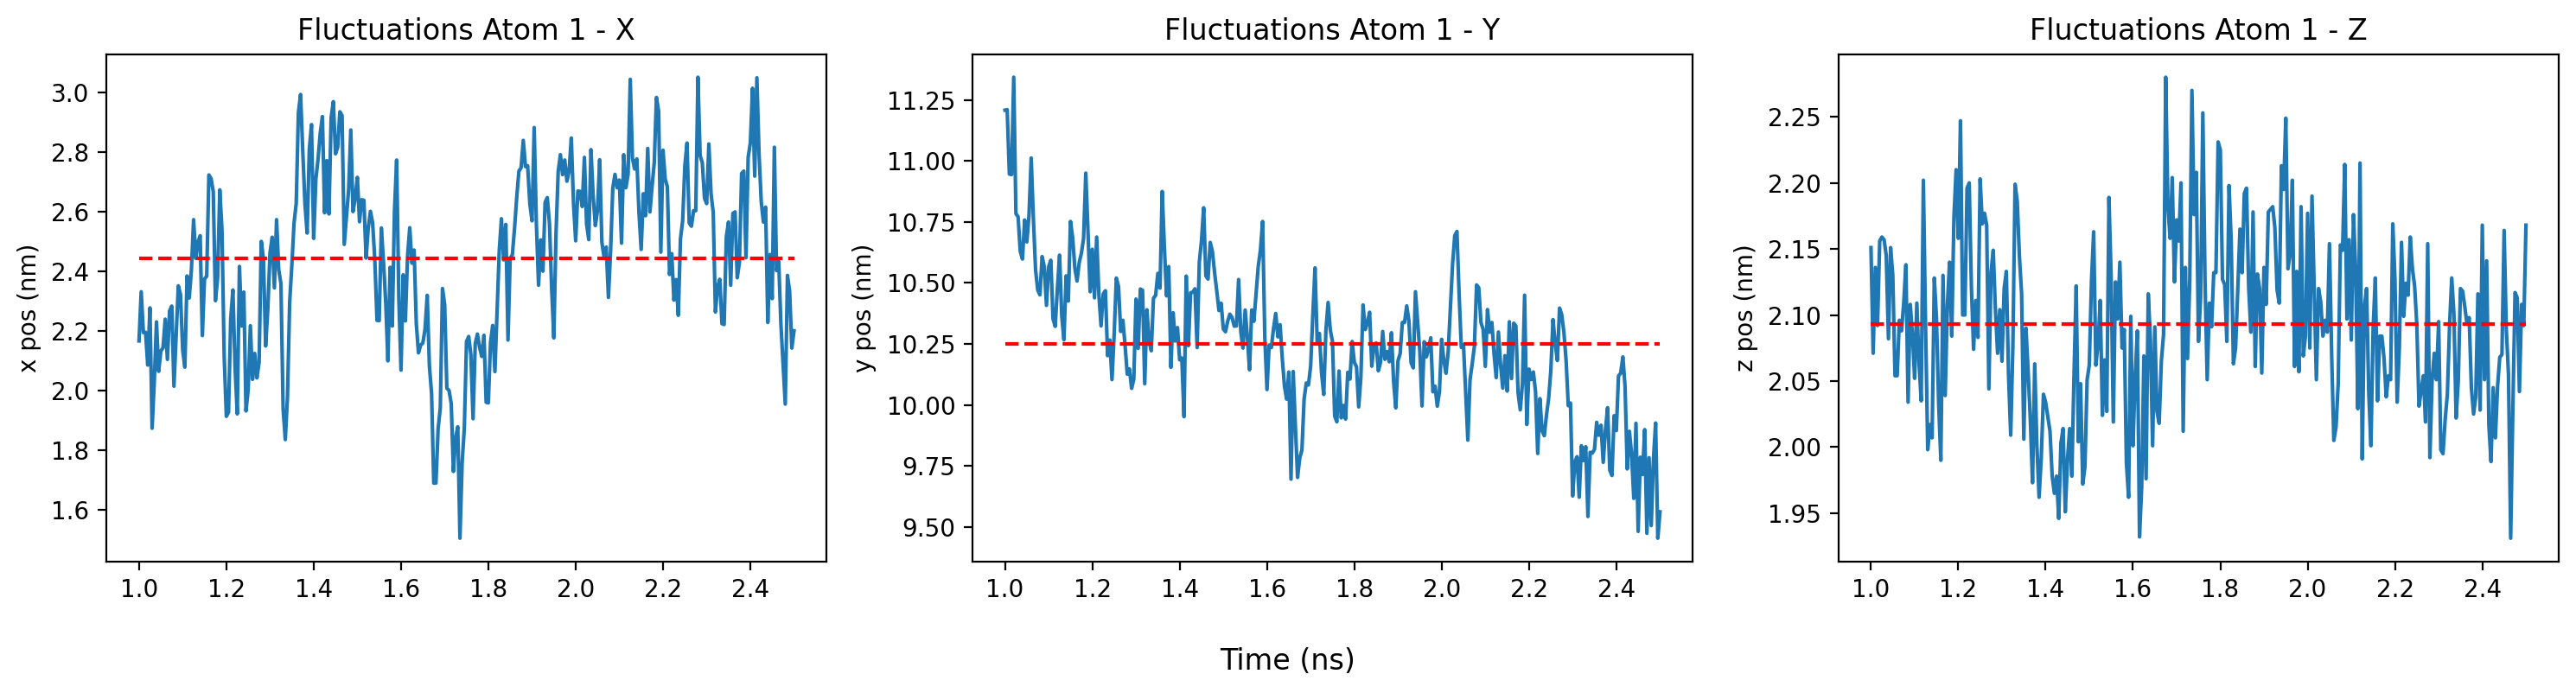

In [36]:
x_at = coords_atom[:, 0]
y_at = coords_atom[:, 1]
z_at = coords_atom[:, 2]
t_window = t[mask]/1e4 #ns

fig, axs = plt.subplots(1, 3, figsize=(15, 4), dpi=200)

# X coordinate
axs[0].plot(t_window, x_at)
axs[0].hlines(np.mean(x_at), t_window[0], t_window[-1], linestyles='dashed', color='r')
axs[0].set_title(f"Fluctuations Atom {atom} - X")
axs[0].set_ylabel("x pos (nm)")

# Y coordinate
axs[1].plot(t_window, y_at)
axs[1].hlines(np.mean(y_at), t_window[0], t_window[-1], linestyles='dashed', color='r')
axs[1].set_title(f"Fluctuations Atom {atom} - Y")
axs[1].set_ylabel("y pos (nm)")

# Z coordinate
axs[2].plot(t_window, z_at)
axs[2].hlines(np.mean(z_at), t_window[0], t_window[-1], linestyles='dashed', color='r')
axs[2].set_title(f"Fluctuations Atom {atom} - Z")
axs[2].set_ylabel("z pos (nm)")

fig.supxlabel('Time (ns)')

plt.tight_layout()
plt.show()

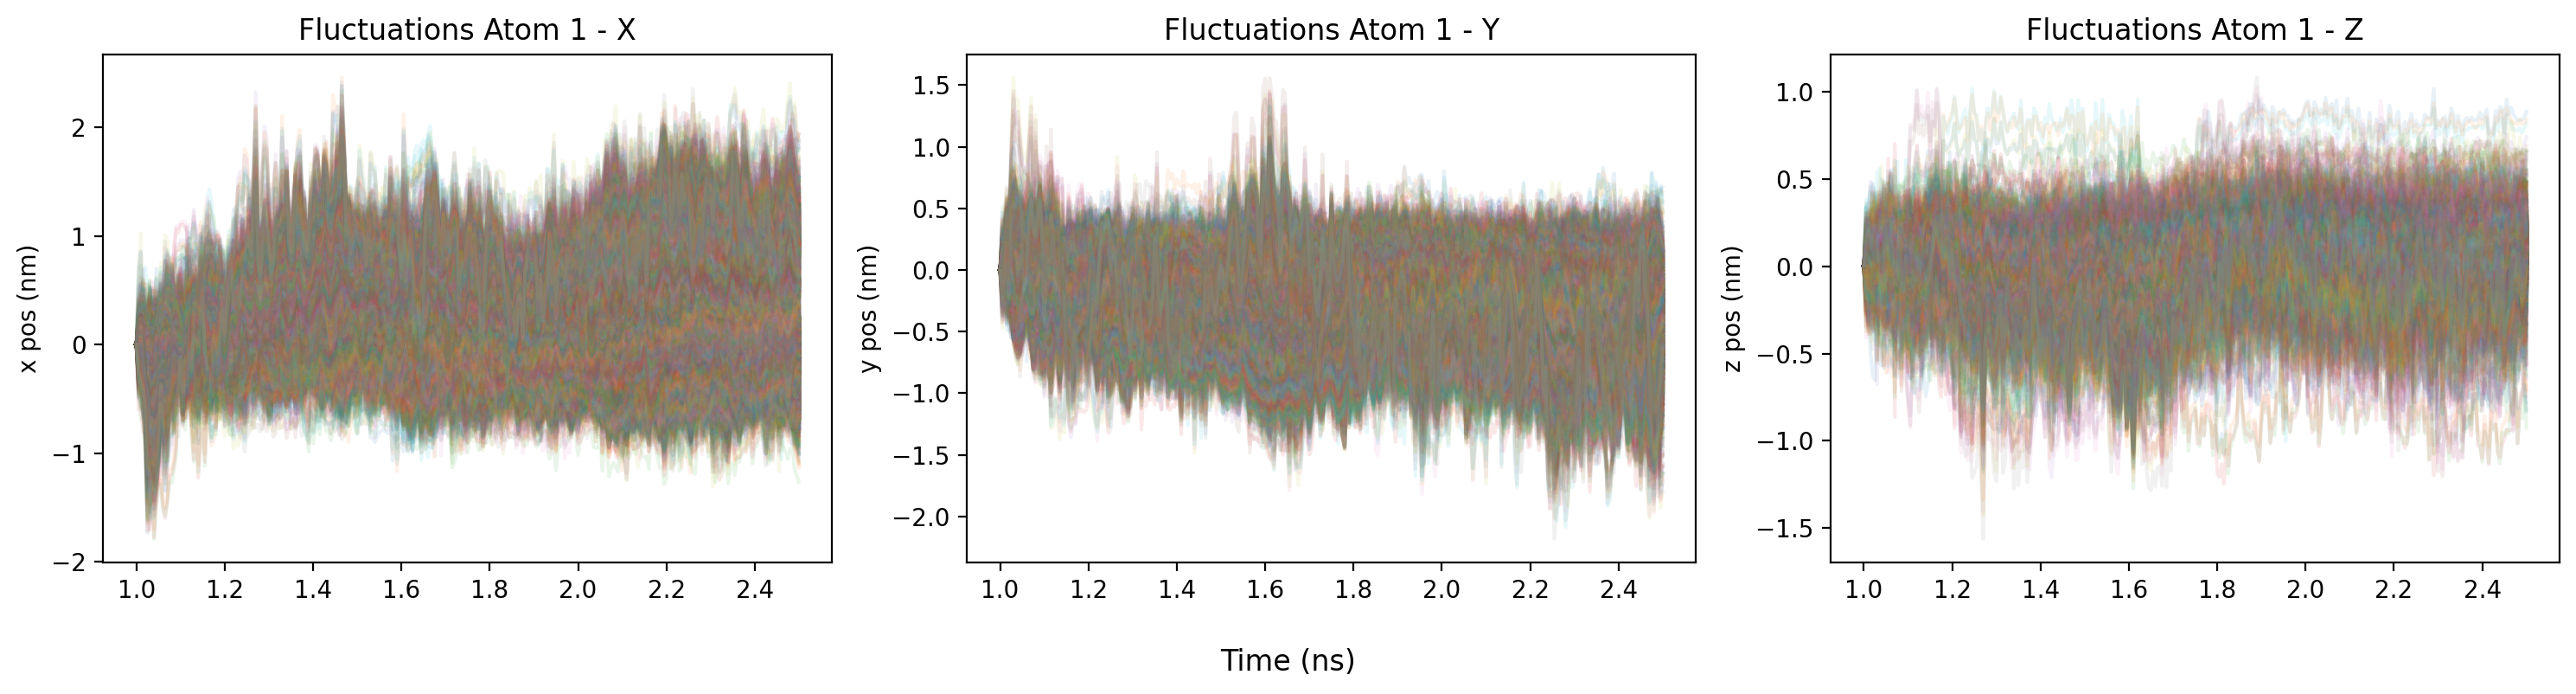

In [37]:
atoms = np.array(coords_saving).shape[1]

fig, axs = plt.subplots(1, 3, figsize=(15, 4), dpi=200)
t_window = t[mask]/1e4 #ns

for i in range(atoms):
    coords_atom = np.array(coords_saving)[:, i]
    x_at = coords_atom[:, 0]
    y_at = coords_atom[:, 1]
    z_at = coords_atom[:, 2]
    # Centralize them
    x_at = x_at - x_at[0]
    y_at = y_at - y_at[0]
    z_at = z_at - z_at[0]

    axs[0].plot(t_window, x_at, alpha=0.1)
    axs[1].plot(t_window, y_at, alpha=0.1)
    axs[2].plot(t_window, z_at, alpha=0.1)

# Axes
axs[0].set_title(f"Fluctuations Atom {atom} - X")
axs[0].set_ylabel("x pos (nm)")
axs[1].set_title(f"Fluctuations Atom {atom} - Y")
axs[1].set_ylabel("y pos (nm)")
axs[2].set_title(f"Fluctuations Atom {atom} - Z")
axs[2].set_ylabel("z pos (nm)")

fig.supxlabel('Time (ns)')

plt.tight_layout()
plt.show()
    

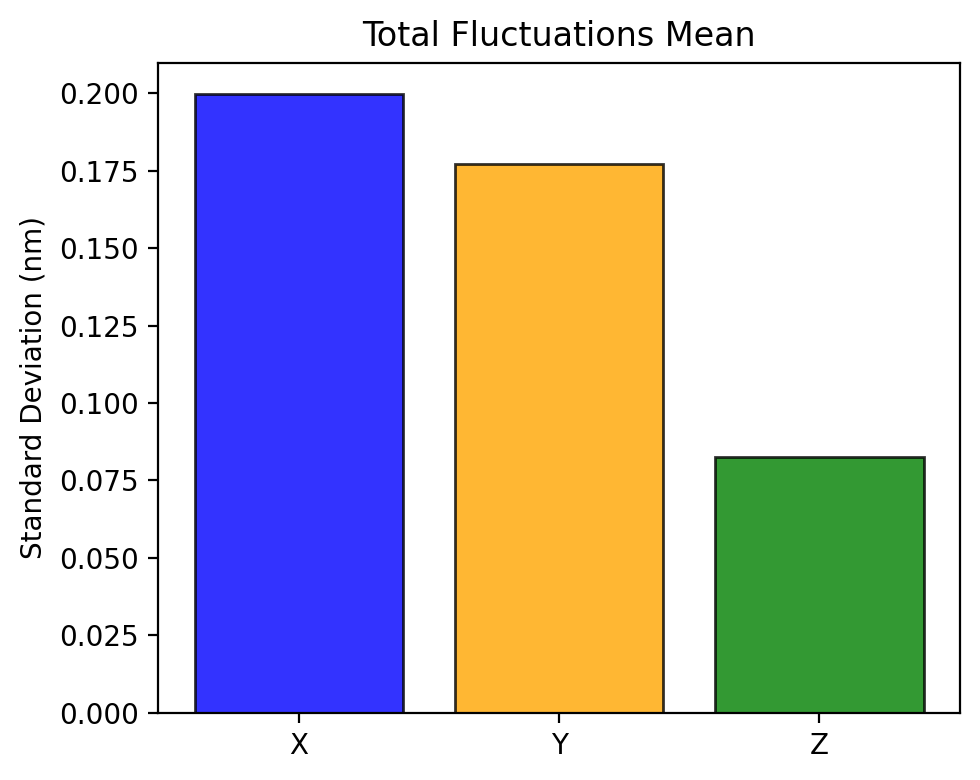

In [38]:
std_x = std_mean[0]
std_y = std_mean[1]
std_z = std_mean[2]

coords_labels = ['X', 'Y', 'Z']
stds = [std_x, std_y, std_z]

plt.figure(figsize=(5, 4), dpi=200)
plt.bar(coords_labels, stds, color=['b', 'orange', 'g'], edgecolor='k', alpha=0.8)

plt.ylabel("Standard Deviation (nm)")
plt.title(f"Total Fluctuations Mean")
plt.tight_layout()
plt.show()